This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).


In [1]:
# @title $Install \ \ PPS \ \ Score$
#!pip install ppscore

In [2]:
# @title $Install \ \ SweetViz$
#!pip install sweetviz

# $Step \ 1: Import \ \ Python \ \ Libraries$

In [3]:
# @title $Libraries$
import pandas as pd
import numpy as np
import sympy as sp
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import ppscore as pps

from IPython.display import HTML, Math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 80

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# $Step \ 2: Reading \ \ Dataset$

In [126]:
df0 = pd.read_excel('Bankruptcy.xlsx')
df0.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# $Analyzing \ \ the \ \ Data$

In [5]:

df0.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [6]:
# @title $Shape \ \ of \ \ the \ \ Dataframe$
df0.shape

(250, 7)

* There are 250 records in the dataset
* There are 6 features(X) and one target column

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


* There are no null entries in the dataset
* Datatype of all feature columns is float64 and of target column is object  



In [8]:
df0.duplicated().sum()

147

In total there are 147 duplicate records

In [9]:
# @title $Check \ \ Unique \ \ Values$
for col in df0.columns:
  print(f'{col} : {df0[col].nunique()}')
print('-----------------------------------------------------')

for col in df0.columns:
  print('Column :', col)
  print(df0[col].value_counts())
  print()

industrial_risk : 3
management_risk : 3
financial_flexibility : 3
credibility : 3
competitiveness : 3
operating_risk : 3
class : 2
-----------------------------------------------------
Column : industrial_risk
1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

Column : management_risk
1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64

Column : financial_flexibility
0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64

Column : credibility
0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64

Column : competitiveness
0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64

Column : operating_risk
1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64

Column : class
non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64



* Each column has three unique values and are 0.0, 0.5, 1.0, which is as per the requirment. That means there are no any invalid entries in the dataset

## We will drop the duplicate records

In [10]:
print('No. of Duplicate Records =',df0.duplicated().sum())

No. of Duplicate Records = 147


In [11]:
# @title $Drop \ \ Duplicate \ \ Records$

drop_duplicates = "Yes" # @param ["Yes", "No"]
if drop_duplicates == "Yes":
    df=df0.drop_duplicates()
else:
    df=df0.copy()

print('Dataframe Shape :',df.shape)

Dataframe Shape : (103, 7)


In [128]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


<Axes: >

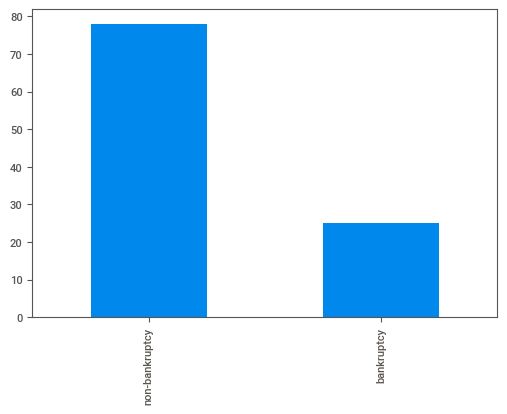

In [129]:
df['class'].value_counts().plot(kind='bar')

In [13]:
# @title $Convert \ \ target \ \ column \ \ into \ \ numerical$
df1 = df.copy()
df1['class'] = df1['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})
df1.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.485437,0.563107,0.504854,0.582524,0.640777,0.514563,0.242718
std,0.404971,0.412308,0.405206,0.377668,0.410747,0.439788,0.430823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,0
187,0.0,0.5,0.5,0.5,1.0,0.5,0
190,0.0,0.5,0.5,0.0,1.0,0.0,0
192,0.5,1.0,0.0,0.0,1.0,0.0,0


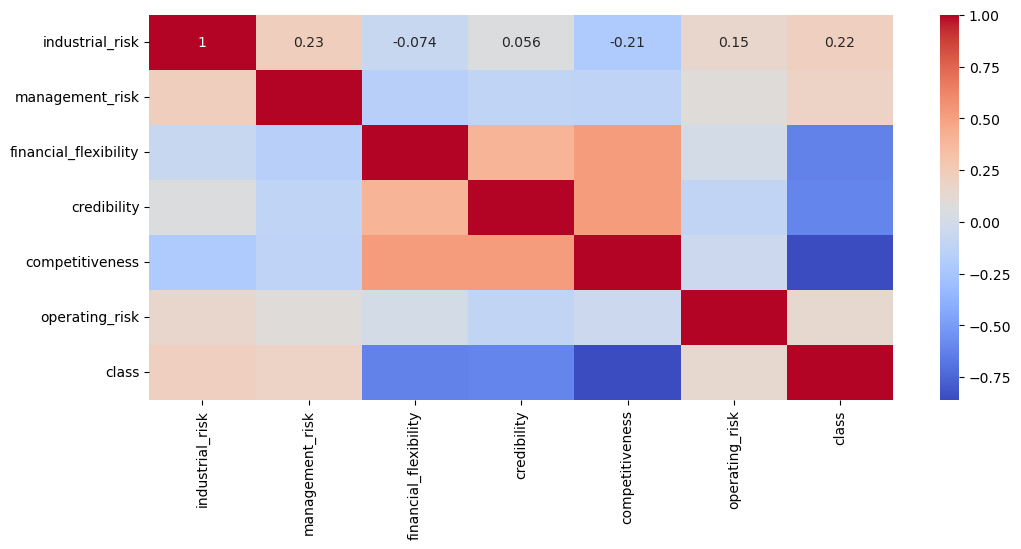

In [14]:
# @title $Correlation \ \ \& \ \ Heatmap$
# Plotting the heatmap
plt.figure(figsize=(12,5), dpi = 100)
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

* Columns 'industrial_risk', 'management_risk', 'operating_risk' are positively correlated with the column 'class'. Which states that whenever there is high industrial, management and operating risk then there are more chances of business to go bankrupt

* Whereas columns 'financial_flexibility', 'credibility', 'competitiveness' are negatively correlated with column 'class'. Which states that whenever there is high financial flexibility, high credibility, high competitiveness then there are very less chances that the business will go bankrupt.

In [15]:
# @title $Data \ \ of \ \ Businesses \ \ which \ \ gone \ \ Bankrupt$
df_bankrupt = df1[df1['class'] == 1]
df_bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
5,1.0,1.0,0.0,0.5,0.0,0.5,1
6,1.0,1.0,0.0,0.0,0.0,0.0,1
7,1.0,1.0,0.0,0.0,0.0,0.5,1
8,1.0,1.0,0.0,0.5,0.0,0.0,1
9,1.0,1.0,0.0,0.5,0.0,1.0,1


In [16]:
# @title $Shape \ \ of \ \ df\_bankrupt$
df_bankrupt.shape

(25, 7)

* Out of 103 records only 25 are of class bankrupt

* Data is imbalanced in the favor of class non-bankrupty, we have to take this in mind while applying machine learning algorithms

In [17]:
# @title $Columns$
columns=df1.columns.tolist()
print(columns)

['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']


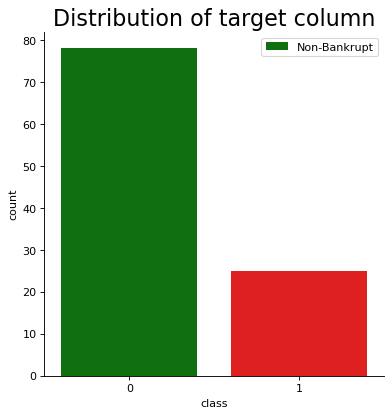

In [18]:
# @title $Distribution \ \ of \ \ target \ \ among \ \ Non-Bankrupt \ \ \& \ \ Bankrupt$

sns.catplot(data=df1, x='class', kind="count", palette=['green', 'red'])
plt.title('Distribution of target column', fontsize=20)
plt.legend(['Non-Bankrupt','Bankrupt'])
plt.show()

<IPython.core.display.Math object>

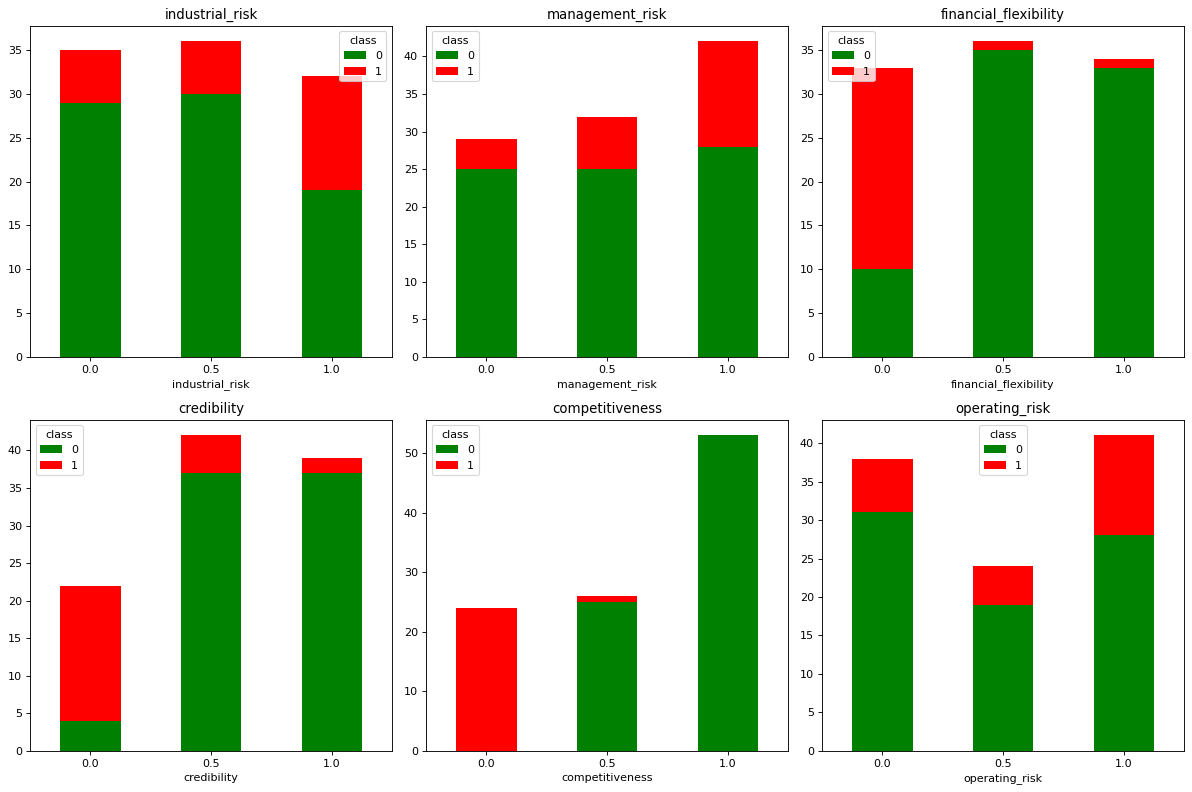

In [19]:

features = df1.columns.tolist()
features.remove('class')

display(Math(r'\Large{ {\color{green}{0 : Non-Bankrupt}} \ \ \& \ \ {\color{red}{1 : Bankrupt}}}'))
figure, axes = plt.subplots(2, 3, figsize=(15,10))
for i,col in enumerate(features):
    my_crosstab1 = pd.crosstab(index=df1[col], columns=df1['class'])
    my_crosstab1.plot(kind='bar',stacked=True, rot=0,ax=axes[i//3,i%3], title = col, color=['green', 'red'])

plt.tight_layout()
plt.show()

<Axes: ylabel='Density'>

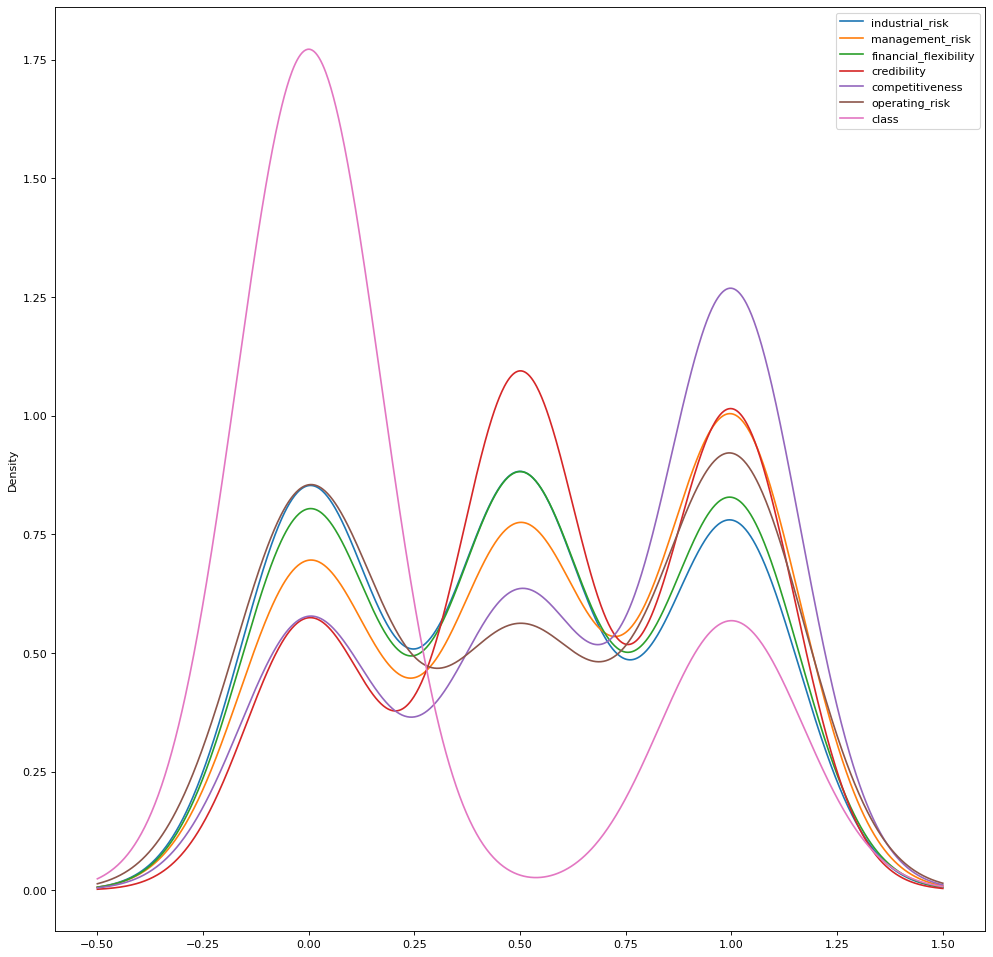

In [20]:
df1.plot(kind='kde',figsize=(15,15))

*High Financial flexibility, Credibility, Competitiveness strongly suggest Non-Bankrupty and vice versa

In [21]:
# @title $Predictive \ \ Power \ \ Score \ \ $
pp = pps.matrix(df1)


In [22]:
# @title $PPS \ \ of \ \ feature \ \ against \ \ target$
pp[pp.y=='class']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.242718,0.350811,DecisionTreeRegressor()
13,management_risk,class,0.000000,regression,True,mean absolute error,0.242718,0.365623,DecisionTreeRegressor()
20,financial_flexibility,class,0.267600,regression,True,mean absolute error,0.242718,0.177767,DecisionTreeRegressor()
27,credibility,class,0.196532,regression,True,mean absolute error,0.242718,0.195016,DecisionTreeRegressor()
34,competitiveness,class,0.918726,regression,True,mean absolute error,0.242718,0.019727,DecisionTreeRegressor()
41,operating_risk,class,0.000000,regression,True,mean absolute error,0.242718,0.375148,DecisionTreeRegressor()
48,class,class,1.000000,predict_itself,True,None,0.000000,1.000000,None


* PPS Score suggest that the features industrial_risk, management_risk and operating_risk are not important to predict Bankrupty

In [134]:
# @title $Feature \ \ Importance \ \ (Using \ \ DecisionTreeClassifier)$

x= df1.iloc[:,0:-1]
y= df1.iloc[:,-1]
#feature importance
model = DecisionTreeClassifier()
model.fit(x, y)
imp = {'columns':x.columns ,'Feature_imp':model.feature_importances_ }
pd.DataFrame(imp)

,columns,Feature_imp
0,industrial_risk,0.000000
1,management_risk,0.000000
2,financial_flexibility,0.026410
3,credibility,0.009895
4,competitiveness,0.947848
5,operating_risk,0.015846


* The featues Industrial  Risk,  Management  Risk &  Operating  Risk all are having PPS score zero and feature importance score also zero, so these features are not important to predict Bankrupty, so we will drop these features.

In [24]:
# @title $Remove \ \ the \ \ features \ \ Industrial \ \ Risk, \ \ Management \ \ Risk\ \& \ \ Operating \ \ Risk $
df2 = df1.copy()
df2.drop(['industrial_risk', 'management_risk'], axis=1, inplace=True)
df2

,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.0,0.0,0.0,0.5,1
1,0.0,0.0,0.0,1.0,1
2,0.0,0.0,0.0,1.0,1
3,0.0,0.5,0.0,1.0,1
4,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...
185,0.0,0.5,1.0,0.5,0
187,0.5,0.5,1.0,0.5,0
190,0.5,0.0,1.0,0.0,0
192,0.0,0.0,1.0,0.0,0


### This indictes that low financial flexibility, low credibility and low competitiveness are the major reasons for bankrupty

In [25]:
# @title $SweetViz$
import sweetviz as sv

sweet_report = sv.analyze(df2)
sweet_report.show_html('bankruptancy.html')

                                             |                                             | [  0%]   00:00 ->…

Report bankruptancy.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Model

## Logistic Regression

In [26]:
x = df2.iloc[:,0:-1]
y = df2.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=10)



le = LogisticRegression()
model_lr = le.fit(train_x,train_y)
model_lr

LogisticRegression()

## Predicting with train and test

In [27]:
pred_tr= model_lr.predict(train_x)

print(classification_report(train_y,pred_tr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.95      0.97        20

    accuracy                           0.99        82
   macro avg       0.99      0.97      0.98        82
weighted avg       0.99      0.99      0.99        82



In [28]:
lr_tr_acc = classification_report(train_y,pred_tr,output_dict=True)['accuracy']
lr_tr_acc

0.9878048780487805

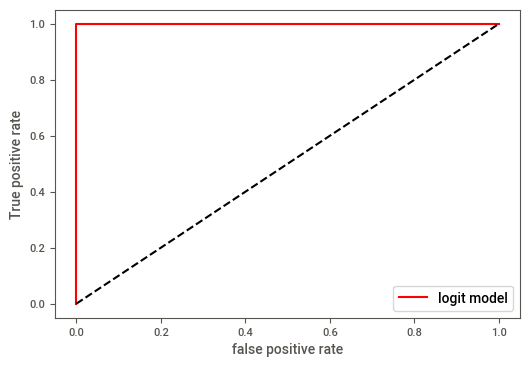

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, threshold1 = roc_curve(train_y,model_lr.predict_proba(train_x)[:,1])
auc1= roc_auc_score(train_y,model_lr.predict_proba(train_x)[:,1])

plt.plot(fpr,tpr,color='red',label='logit model'%auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

In [30]:
pred_tst= model_lr.predict(test_x)

print(classification_report(test_y,pred_tst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [31]:
lr_tst_acc = classification_report(test_y,pred_tst,output_dict=True)['accuracy']
lr_tst_acc

1.0

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y,pred_tst))


[[16  0]
 [ 0  5]]


# Randomforest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [34]:
kfold = KFold(n_splits=10, random_state=5,shuffle=True)

In [35]:
n_estimators = np.array(range(10,50))
max_feature = [2,3]

param_grid = dict(n_estimators =n_estimators,max_features=max_feature)

In [36]:
model_rfc = RandomForestClassifier()

grid_rfc = GridSearchCV(estimator=model_rfc, param_grid=param_grid)

grid_rfc.fit(train_x, train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3],
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [37]:
print(grid_rfc.best_score_)

1.0


In [38]:
m_rfc=RandomForestClassifier(max_features= 2,n_estimators=10)
m_rfc.fit(train_x,train_y)

RandomForestClassifier(max_features=2, n_estimators=10)

## Predicting with train and test

In [39]:
y_grfc_train_predict = m_rfc.predict(train_x)


print(classification_report(train_y,y_grfc_train_predict,output_dict=False))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        20

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [40]:
rfc_tr_acc = classification_report(train_y,y_grfc_train_predict,output_dict=True)['accuracy']
rfc_tr_acc

1.0

In [41]:
y_rfc_test_predict = m_rfc.predict(test_x)

print(classification_report(test_y,y_rfc_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [42]:
rfc_tst_acc = classification_report(test_y,y_rfc_test_predict,output_dict=True)['accuracy']
rfc_tst_acc

1.0

In [43]:
print(confusion_matrix(test_y,y_rfc_test_predict))


[[16  0]
 [ 0  5]]


# Support vector classifiers

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf = SVC()
param_grid_svc = [{'kernel':['rbf','sigmoid','poly'],'gamma':[0.5,0.1,0.005],'C':[25,20,10,0.1,0.001] }]
svc= RandomizedSearchCV(clf,param_grid_svc,cv=10)
svc.fit(train_x,train_y)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [25, 20, 10, 0.1, 0.001],
                                         'gamma': [0.5, 0.1, 0.005],
                                         'kernel': ['rbf', 'sigmoid', 'poly']}])

In [45]:
print(svc.best_score_)
print(svc.best_params_)

0.9875
{'kernel': 'sigmoid', 'gamma': 0.005, 'C': 20}


## Predicting with train and test

In [46]:
y_svc_tr_pred = svc.predict(train_x)

print(classification_report(train_y,y_svc_tr_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.95      0.97        20

    accuracy                           0.99        82
   macro avg       0.99      0.97      0.98        82
weighted avg       0.99      0.99      0.99        82



In [47]:
svc_tr_acc = classification_report(train_y,y_svc_tr_pred,output_dict=True)['accuracy']
svc_tr_acc

0.9878048780487805

In [48]:
y_svc_tst_pred = svc.predict(test_x)

print(classification_report(test_y,y_svc_tst_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [49]:
svc_tst_acc = classification_report(test_y,y_svc_tst_pred,output_dict=True)['accuracy']
svc_tst_acc

1.0

In [50]:
print(confusion_matrix(test_y,y_svc_tst_pred))

[[16  0]
 [ 0  5]]


# Bagging

In [51]:
from sklearn.ensemble import BaggingClassifier

cart = DecisionTreeClassifier()

model_bag = BaggingClassifier(estimator=cart, n_estimators= 10, random_state=6)
model_bag.fit(train_x,train_y)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=6)

## Predicting with train and test

In [52]:
y_bag_tr_pred=model_bag.predict(train_x)

print(classification_report(train_y,y_svc_tr_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.95      0.97        20

    accuracy                           0.99        82
   macro avg       0.99      0.97      0.98        82
weighted avg       0.99      0.99      0.99        82



In [53]:
bag_tr_acc = classification_report(train_y,y_svc_tr_pred,output_dict=True)['accuracy']
bag_tr_acc

0.9878048780487805

In [54]:
y_bag_tst_pred=model_bag.predict(test_x)

print(classification_report(test_y,y_svc_tst_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [55]:
bag_tst_acc = classification_report(test_y,y_svc_tst_pred,output_dict=True)['accuracy']
bag_tst_acc

1.0

In [56]:
print(confusion_matrix(test_y,y_svc_tst_pred))

[[16  0]
 [ 0  5]]


# XGBClassifier

In [57]:
from xgboost import XGBClassifier

In [58]:
n_estimators =np.array(range(10,80,10))
n_estimators

array([10, 20, 30, 40, 50, 60, 70])

In [59]:
from sklearn.metrics import accuracy_score

for i in n_estimators:
    model = XGBClassifier(n_estimators=i)
    model.fit(train_x,train_y)
    
    ypred_train = model.predict(train_x)
    
    acc = accuracy_score(train_y,ypred_train) * 100
    print('n_estimators=',i,"Accuracy =", acc)

n_estimators= 10 Accuracy = 98.78048780487805
n_estimators= 20 Accuracy = 98.78048780487805
n_estimators= 30 Accuracy = 98.78048780487805
n_estimators= 40 Accuracy = 98.78048780487805
n_estimators= 50 Accuracy = 98.78048780487805
n_estimators= 60 Accuracy = 98.78048780487805
n_estimators= 70 Accuracy = 98.78048780487805


In [60]:
modelx = XGBClassifier(n_estimators=70,max_depth=5)
modelx.fit(train_x,train_y)
    
y_xgbm_tr_pred = modelx.predict(train_x)

## Predicting with train and test

In [61]:
print(classification_report(train_y,ypred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      0.95      0.97        20

    accuracy                           0.99        82
   macro avg       0.99      0.97      0.98        82
weighted avg       0.99      0.99      0.99        82



In [62]:
xgbm_tr_acc = classification_report(train_y,ypred_train,output_dict=True)['accuracy']
xgbm_tr_acc

0.9878048780487805

In [63]:
y_xgbm_test_pred = modelx.predict(test_x)

In [64]:
xgbm_tst_acc = classification_report(test_y,y_xgbm_test_pred,output_dict=True)['accuracy']
xgbm_tst_acc

1.0

In [65]:
print(confusion_matrix(test_y,y_xgbm_test_pred))

[[16  0]
 [ 0  5]]


# LGBM

In [66]:
import lightgbm as lgb

In [67]:
params = {}
params['learning_rate'] = 1
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 5
params['min_data'] = 10
params['max_depth'] = 5

In [68]:
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(train_x,train_y)

[LightGBM] [Info] Number of positive: 20, number of negative: 62
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 82, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243902 -> initscore=-1.131402
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

LGBMClassifier()

## Predicting with train and test

In [69]:
Y_pred_train_lgbm = model_lgbm.predict(train_x)
print(classification_report(Y_pred_train_lgbm,train_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        20

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



In [70]:
lgbm_tr_acc = classification_report(Y_pred_train_lgbm,train_y,output_dict=True)['accuracy']
lgbm_tr_acc

1.0

In [71]:
Y_pred_test_lgbm = model_lgbm.predict(test_x)
print(classification_report(Y_pred_test_lgbm,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [72]:
lgbm_tst_acc = classification_report(Y_pred_test_lgbm,test_y,output_dict=True)['accuracy']
lgbm_tst_acc

1.0

In [73]:
print(confusion_matrix(Y_pred_test_lgbm,test_y))

[[16  0]
 [ 0  5]]


# Naive byase

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB()

## Predicting with train and test

In [75]:
Y_pred_tr_nb = gnb.predict(train_x)

accuracy_train_nb = np.mean(Y_pred_tr_nb==train_y)
accuracy_train_nb

0.975609756097561

In [76]:
print(classification_report(Y_pred_tr_nb,train_y))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.90      1.00      0.95        18

    accuracy                           0.98        82
   macro avg       0.95      0.98      0.97        82
weighted avg       0.98      0.98      0.98        82



In [77]:
Y_pred_tst_nb = gnb.predict(test_x)

accuracy_test_nb = np.mean(Y_pred_tst_nb==test_y)
accuracy_test_nb

1.0

In [78]:
print(confusion_matrix(test_y,Y_pred_tst_nb))

[[16  0]
 [ 0  5]]


# Accuracy of diffrent models

In [79]:
accuracy={
    "Logistic regression": [lr_tr_acc,lr_tst_acc],
    "Random forest":[rfc_tr_acc,rfc_tst_acc],
    "Support vector classification": [svc_tr_acc,svc_tst_acc],
    "Bagging":[bag_tr_acc,bag_tst_acc],
    "XGBM":[xgbm_tr_acc,xgbm_tst_acc],
    "lgbm":[lgbm_tr_acc,lgbm_tst_acc],
    "Naive Byaes":[accuracy_train_nb,accuracy_train_nb]
}

In [80]:
imbalace_acc= pd.DataFrame(accuracy,columns=accuracy.keys(),index=['train','test']).T
imbalace_acc

,train,test
Logistic regression,0.987805,1.00000
Random forest,1.000000,1.00000
Support vector classification,0.987805,1.00000
Bagging,0.987805,1.00000
XGBM,0.987805,1.00000
lgbm,1.000000,1.00000
Naive Byaes,0.975610,0.97561


# Crossvalidation of models

In [81]:
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=5,shuffle=True)

In [82]:
results_lr2 = cross_val_score(model_lr,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

# RANDOMFOREST
results_RF = cross_val_score(m_rfc,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#SVC
results_svc = cross_val_score(svc,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#Baggin-decision
results_bag = cross_val_score(model_bag,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#xgbm classifier
results_xgbm = cross_val_score(modelx,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#lgbm classifier
results_lgbm = cross_val_score(model_lgbm,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#Naive byase classifier
results_nb = cross_val_score(gnb,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

print(round(results_lr2.mean(),3))

[LightGBM] [Info] Number of positive: 22, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239130 -> initscore=-1.157453
[LightGBM] [Info] Start training from score -1.157453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0.99


In [83]:
accuracy_score = {
    'logistic Regression':round(results_lr2.mean(),3),
    'Random Forest': round(results_RF.mean(),3),
    'Support vector classifier':round(results_svc.mean(),3),
    'Dt-bagging': round(results_bag.mean(),3),
    'XGBM Classifier':round(results_xgbm.mean(),3),
    'lightGBM classifer':round(results_lgbm.mean(),3),
    'Naive byes': round(results_nb.mean(),3)
    
}

In [84]:
pd.DataFrame(accuracy_score,index=['validation_score']).T

,validation_score
logistic Regression,0.990
Random Forest,0.981
Support vector classifier,0.971
Dt-bagging,0.962
XGBM Classifier,0.991
lightGBM classifer,0.982
Naive byes,0.981


Above values are for imbalance data

<Axes: ylabel='Frequency'>

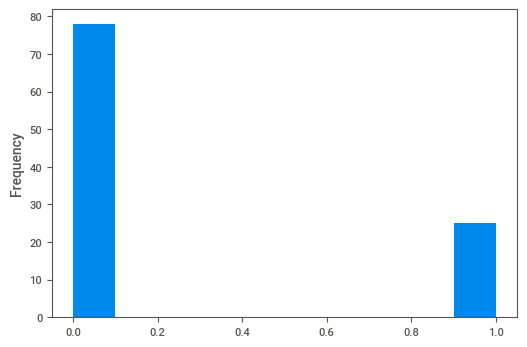

In [85]:
df2['class'].plot(kind='hist')

# Balancing the Data

In [86]:
non_bank = df2[df2['class']==0]
bank = df2[df2['class']==1]

print(non_bank.shape,bank.shape)

(78, 5) (25, 5)


In [87]:
from sklearn.utils import resample
from sklearn.utils import shuffle

non_bank_downsample =  resample(non_bank,replace=True, n_samples=len(bank), random_state=42)

df3=pd.concat([non_bank_downsample,bank])

In [88]:
bal_df =df2.drop(df2[df2['class']==0].sample(53).index,axis=0)

In [89]:
bal_df =shuffle(bal_df)
bal_bf = bal_df.reset_index(inplace=True)

In [90]:
bal_df.drop(columns=['index'],inplace=True)

In [91]:
bal_df.head()

,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,0.5,1.0,1.0,0
1,0.5,1.0,0.5,1.0,0
2,0.0,0.0,0.0,1.0,1
3,0.0,0.0,0.0,0.0,1
4,0.0,0.5,0.0,1.0,1


<Axes: ylabel='Frequency'>

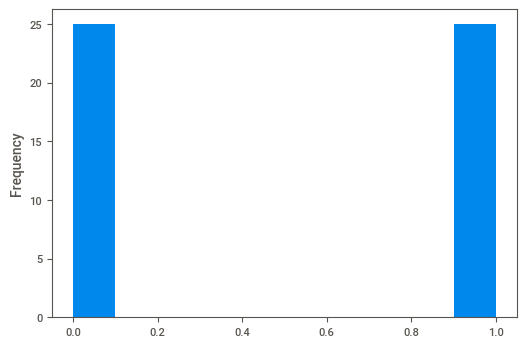

In [92]:
bal_df['class'].plot(kind='hist')

In [93]:
bx=bal_df.iloc[:,0:-1]
by=bal_df.iloc[:,-1]

train_bx,test_bx,train_by,test_by = train_test_split(bx,by,test_size=0.2)

In [94]:
bm_lr = le.fit(train_bx,train_by)

pred_bm_lr_tr= bm_lr.predict(train_bx)

#Predicting with test and train
from sklearn.metrics import accuracy_score
acc_tr_lr= accuracy_score(train_by,pred_bm_lr_tr) * 100
print('accuracy score train=',acc)

pred_bm_lr_tst= bm_lr.predict(test_bx)
acc_tst_lr=accuracy_score(test_by,pred_bm_lr_tst) * 100

print('accuracy score test=',acc)

accuracy score train= 98.78048780487805
accuracy score test= 98.78048780487805


# Randomforest

In [95]:
bal_m_rfc= GridSearchCV(estimator=model_rfc, param_grid=param_grid)
bal_m_rfc.fit(train_bx,train_by)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3],
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

## Predicting with train and test

In [96]:
bal_rfc=RandomForestClassifier(max_features=2,n_estimators=42)
bal_rfc.fit(train_bx,train_by)

bal_rfc_tr_pred= bal_rfc.predict(train_bx)
acc_tr_rfc=accuracy_score(train_by,bal_rfc_tr_pred)*100
print('accuracy score train=',acc_tr_rfc)

bal_rfc_tst_pred= bal_rfc.predict(test_bx)
acc_tst_rfc=accuracy_score(test_by,bal_rfc_tst_pred)*100
print('accuracy score test=',acc_tst_rfc)


accuracy score train= 100.0
accuracy score test= 100.0


# Support Vector Classification

In [97]:
param_grid_svc = [{'kernel':['rbf','sigmoid','poly'],'gamma':[0.5,0.1,0.005],'C':[25,20,10,0.1,0.001] }]

bal_m_svc= RandomizedSearchCV(clf,param_grid_svc,cv=10)
bal_m_svc.fit(train_bx,train_by)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [25, 20, 10, 0.1, 0.001],
                                         'gamma': [0.5, 0.1, 0.005],
                                         'kernel': ['rbf', 'sigmoid', 'poly']}])

In [98]:
print(bal_m_svc.best_score_)

1.0


In [99]:
bal_svc_tr_pred= bal_m_svc.predict(train_bx)
acc_tr_svc=accuracy_score(train_by,bal_svc_tr_pred)*100
print('accuracy score train=',acc_tr_svc)

bal_svc_tst_pred= bal_m_svc.predict(test_bx)
acc_tst_svc=accuracy_score(test_by,bal_svc_tst_pred)*100
print('accuracy score test=',acc_tst_svc)

accuracy score train= 100.0
accuracy score test= 90.0


# Bagging

In [100]:
bal_m_bag = BaggingClassifier(estimator=cart, n_estimators= 10, random_state=6)
bal_m_bag.fit(train_bx,train_by)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=6)

## Predicting with train and test

In [101]:
y_pred_bal_bag=bal_m_bag.predict(train_bx)
acc_tr_bag=accuracy_score(train_by,y_pred_bal_bag)*100
print('accuracy score train=',acc_tr_bag)

bal_bag_tst_pred= bal_m_bag.predict(test_bx)
acc_tst_bag=accuracy_score(test_by,bal_bag_tst_pred)*100
print('accuracy score test=',acc_tst_bag)

accuracy score train= 100.0
accuracy score test= 90.0


# lgbm classifier

In [102]:
bal_m_lgbm = lgb.LGBMClassifier(params)
bal_m_lgbm.__init__(boosting_type='gbdt')
bal_m_lgbm.fit(train_x,train_y)

[LightGBM] [Info] Number of positive: 20, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 82, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243902 -> initscore=-1.131402
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier()

## Predicting with train and test

In [103]:
y_pred_bal_lgbm=bal_m_lgbm.predict(train_bx)
acc_tr_lgbm=accuracy_score(train_by,y_pred_bal_lgbm)*100
print('accuracy score train=',acc_tr_lgbm)

bal_bag_tst_lgbm= bal_m_lgbm.predict(test_bx)
acc_tst_lgbm=accuracy_score(test_by,bal_bag_tst_lgbm)*100
print('accuracy score train=',acc_tst_lgbm)

accuracy score train= 100.0
accuracy score train= 100.0


# xgbm classifier

In [104]:
bal_xgbm= XGBClassifier(n_estimators=70,max_depth=5)
bal_xgbm.fit(train_bx,train_by)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Presdicting with train and test

In [105]:
y_pred_bal_xgbm=bal_xgbm.predict(train_bx)
acc_tr_xgbm=accuracy_score(train_by,y_pred_bal_xgbm)*100
print('accuracy score train=',acc)

bal_bag_tst_xgbm= bal_xgbm.predict(test_bx)
acc_tst_xgbm=accuracy_score(test_by,bal_bag_tst_xgbm)*100
print('accuracy score train=',acc)

accuracy score train= 98.78048780487805
accuracy score train= 98.78048780487805


# Naive byaes

In [106]:
bal_gnb = GaussianNB()
bal_gnb.fit(train_bx, train_by)

GaussianNB()

In [107]:
y_pred_bal_gnb=bal_gnb.predict(train_bx)
acc_tr_gnb=accuracy_score(train_by,y_pred_bal_gnb)*100
print('accuracy score train=',acc)

bal_bag_tst_gnb= bal_gnb.predict(test_bx)
acc_tst_gnb=accuracy_score(test_by,bal_bag_tst_gnb)*100
print('accuracy score train=',acc)

accuracy score train= 98.78048780487805
accuracy score train= 98.78048780487805


# Crossvalidating models from balance data

In [108]:
results_lr_b = cross_val_score(bm_lr,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

In [109]:
# RANDOMFOREST
results_rfc_b = cross_val_score(bal_rfc,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

In [110]:

#SVC
results_svc_b = cross_val_score(bal_m_svc,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#Baggin-decision
results_bag_b = cross_val_score(bal_m_bag,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#xgbm classifier
results_xgbm_b = cross_val_score(bal_xgbm,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#lgbm classifier
results_lgbm_b = cross_val_score(bal_m_lgbm,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

#Naive byase classifier
results_nb_b = cross_val_score(bal_gnb,df2.iloc[:,0:-1],df2.iloc[:,-1], cv=kfold)

[LightGBM] [Info] Number of positive: 22, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239130 -> initscore=-1.157453
[LightGBM] [Info] Start training from score -1.157453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 23, number of negative: 70
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 93, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247312 -> initscore=-1.113001
[LightGBM] [Info] Start training from score -1.113001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [111]:
accuracy_score_b = {
    'logistic Regression':round(results_lr_b.mean(),3),
    'Random Forest': round(results_rfc_b.mean(),3),
    'Support vector classifier':round(results_svc_b.mean(),3),
    'Dt-bagging': round(results_bag_b.mean(),3),
    'XGBM Classifier':round(results_xgbm_b.mean(),3),
    'lightGBM classifer':round(results_lgbm_b.mean(),3),
    'Naive byes': round(results_nb_b.mean(),3)
    
}

In [112]:
pd.DataFrame(accuracy_score_b,index=['validation_score']).T

,validation_score
logistic Regression,0.990
Random Forest,0.991
Support vector classifier,0.990
Dt-bagging,0.962
XGBM Classifier,0.991
lightGBM classifer,0.982
Naive byes,0.981


In [113]:
type_cls=['Logistic Regression','RandomForest','support vector','Bagging','XGBM','LGBM',"Niave bayes"]
models_imbalace = ['model_lr','m_rfc','svc','model_bag','modelx','model_lgbm','gnb']
models_balaced = ['bm-lr','bal_m_rfc','bal_m_svc','bal_m_bag','bal_xgbm','bal_m_lgbm','bal_gnb']

In [114]:
ibalance_Train_acc=[lr_tr_acc,rfc_tr_acc,svc_tr_acc,bag_tr_acc,xgbm_tr_acc,lgbm_tr_acc,accuracy_train_nb]
ibalance_test_acc=[lr_tst_acc,rfc_tst_acc,svc_tst_acc,bag_tst_acc,xgbm_tst_acc,lgbm_tst_acc,accuracy_test_nb]
balance_Train_acc=[acc_tr_lr,acc_tr_rfc,acc_tr_svc,acc_tr_bag,acc_tr_xgbm,acc_tr_lgbm,acc_tr_gnb]
balance_test=[acc_tst_lr,acc_tst_rfc,acc_tst_svc,acc_tst_bag,acc_tst_xgbm,acc_tst_lgbm,acc_tst_gnb]

In [115]:
list_model=pd.DataFrame(data=models_imbalace,index=type_cls,columns=['model_imbalace'])

In [116]:
list_model['ibalance_Train']=ibalance_Train_acc
list_model['ibalance_test']=ibalance_test_acc
list_model['model_balaced']=models_balaced
list_model['balance_Train']=balance_Train_acc
list_model['balance_test']=balance_test

In [117]:
columns=[('imbalanced','models_imbalace'),('imbalanced','ibalance_Train'),('imbalanced','ibalance_test'),
                    ('balanced','model_balaced'),('balanced','balance_Train'),('balanced','balance_test')]

In [118]:
list_model.columns=pd.MultiIndex.from_tuples(columns)

In [119]:
list_model

imbalanced                               \
                    models_imbalace ibalance_Train ibalance_test   
Logistic Regression        model_lr       0.987805           1.0   
RandomForest                  m_rfc       1.000000           1.0   
support vector                  svc       0.987805           1.0   
Bagging                   model_bag       0.987805           1.0   
XGBM                         modelx       0.987805           1.0   
LGBM                     model_lgbm       1.000000           1.0   
Niave bayes                     gnb       0.975610           1.0   

                         balanced                             
                    model_balaced balance_Train balance_test  
Logistic Regression         bm-lr         100.0        100.0  
RandomForest            bal_m_rfc         100.0        100.0  
support vector          bal_m_svc         100.0         90.0  
Bagging                 bal_m_bag         100.0         90.0  
XGBM                     bal_xgbm          97.5        100.0  
LGBM                   bal_m_lgbm         100.0        100.0  
Niave bayes               bal_gnb          97.5        100.0

From above data 'list_model' . 'Random forest' and 'LGBM' model have high accuracy for both ibalanced and balanced data

# Predicting total data with model "random forest" and "lgbm"

### LGBM model

In [120]:
pred=bal_m_lgbm.predict(df2.iloc[:,0:-1])

In [121]:
confusion_matrix(df2.iloc[:,-1],pred)

array([[78,  0],
       [ 0, 25]], dtype=int64)

In [122]:
print(classification_report(df2.iloc[:,-1],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        25

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



# Random forest Model

In [123]:
pred_=bal_m_rfc.predict(df2.iloc[:,0:-1])
confusion_matrix(df2.iloc[:,-1],pred_)

array([[76,  2],
       [ 0, 25]], dtype=int64)

In [124]:
print(classification_report(df2.iloc[:,-1],pred_))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        78
           1       0.93      1.00      0.96        25

    accuracy                           0.98       103
   macro avg       0.96      0.99      0.97       103
weighted avg       0.98      0.98      0.98       103



In [125]:
import pickle
filename = 'Bankruptancy.pkl'
pickle.dump(bal_m_lgbm,open(filename,'wb'))